In [1]:
# importing all the required libraries

import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt    # datetime module

#importing warnings library to ignore all warnings
import warnings
warnings.filterwarnings("ignore")

#importing visualization libraries
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import seaborn as sns  #visualization

import plotly.offline as py                 #visualization
py.init_notebook_mode(connected=True)       #visualization
import plotly.graph_objs as go              #visualization
import plotly.tools as tls                  #visualization
import plotly.figure_factory as ff          #visualization

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # check VIF

#importing sklearn for mode related stuff
import sklearn
from sklearn.model_selection import train_test_split # test train split
from sklearn.metrics import r2_score # check r2 score

from sklearn.preprocessing import MinMaxScaler # scaling

from sklearn.feature_selection import RFE # for RFE
from sklearn.linear_model import LinearRegression # LR

pd.set_option("display.max_columns", None)   # setting max columns view
pd.set_option('display.max_rows', 120)       # setting 120 rows view

import warnings
warnings.filterwarnings('ignore') # ignore warning

In [2]:
#reading dataset from csv file
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Viewing basic information about the dataset

rows = data.shape[0] 
cols = data.shape[1]
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures :\n",data.columns.tolist())
print ("\nPercentage wise missing values in each column:\n\n",100*data.isnull().sum()/len(data.index))

Rows     :  730
Columns  :  16

Features :
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Percentage wise missing values in each column:

 instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [4]:
# Checking datatype of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### We can see that there is no missing value in rows or columns and also, all the columns are into their respective data types.

In [5]:
# Renaming columns for better reading purpose
data = data.rename(columns={'yr':'year', 'mnth':'month', 'cnt': 'counts'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the categorical values 

#### 1. Season

In [6]:
print(data.season.value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64


In [7]:
# 1,2,3,4 are not quite useful for us, let's map season category as per dict
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### 2. Year

In [8]:
print( data.year.value_counts())

0    365
1    365
Name: year, dtype: int64


In [9]:
# Renaming year to respective year as per dictionary provided for better reading
data.year = data.year.map({0:'2018', 1:'2019'})

#### 3. Month

In [10]:
print(data.month.value_counts())

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64


In [11]:
# Rename month inton respective name for better visualisation
data.month = data.month.map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept',
                            10:'Oct', 11:'Nov', 12:'Dec'})

#### 4. Holiday

In [12]:
print( data.holiday.value_counts())

0    709
1     21
Name: holiday, dtype: int64


#### 5. Workingday

In [13]:
print( data.workingday.value_counts())

1    499
0    231
Name: workingday, dtype: int64


In [14]:
#### Working day and holiday already are in binary. We don't have to change

#### 6. Weather situation

In [15]:
print( data.weathersit.value_counts())

1    463
2    246
3     21
Name: weathersit, dtype: int64


In [16]:
# Renaming weathersit values to their respective name
data.weathersit = data.weathersit.map({1:'Clear', 2:'Cloudy', 3:'Snow/Rain'})

#### 7. Weekday

In [17]:
print(data.weekday.value_counts())

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


In [18]:
# renaming weekdays to respective name 
data.weekday = data.weekday.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
                                 4:'Friday', 5:'Saturday', 6:'Sunday'})

# Data Cleanup

In [19]:
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,1,01-01-2018,spring,2018,Jan,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#checking instant column
data.instant.nunique()

730

In [21]:
# Dropping instant column as it is nothing but the index
data = data.drop(columns=['instant'])

In [22]:
# checking dteday
print('\ndteday')
print(data.dteday.nunique())
print(data.dteday.value_counts())

#checking year
print('\nyear')
print(data.year.nunique())
print(data.year.value_counts())

#checking month
print('\nmonth')
print(data.month.nunique())
print(data.month.value_counts())

#checking weekday
print('\nweekday')
print(data.weekday.nunique())
print(data.weekday.value_counts())

#checking working day
print('\nworkingday')
print(data.workingday.nunique())
print(data.workingday.value_counts())

#checking holidayday
print('\nholiday')
print(data.holiday.nunique())
print(data.holiday.value_counts())

# checking weathersit
print('\nweathersit')
print(data.weathersit.nunique())
print(data.weathersit.value_counts())

# checking season
print('\nseason')
print(data.season.nunique())
print(data.season.value_counts())


dteday
730
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

year
2
2018    365
2019    365
Name: year, dtype: int64

month
12
Jan      62
March    62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sept     60
Nov      60
Feb      56
Name: month, dtype: int64

weekday
7
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: weekday, dtype: int64

workingday
2
1    499
0    231
Name: workingday, dtype: int64

holiday
2
0    709
1     21
Name: holiday, dtype: int64

weathersit
3
Clear        463
Cloudy       246
Snow/Rain     21
Name: weathersit, dtype: int64

season
4
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [23]:
# Dropping dteday column as it the date column and we already have year, month and weekday column
data = data.drop(columns=['dteday'])

In [24]:
# Dropping holiday column as 70% of data is 0 means, non holiday
data = data.drop(columns=['holiday'])

In [25]:
data.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,spring,2018,Jan,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
# We can clearly see that the season, yr, mnth, holiday, weekday, workingday, weathersit are the categorical vars
cat_vars = ['season', 'year', 'month', 'weekday', 'workingday', 'weathersit']

#num vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

#### All data is good to go now. Let's start analysis

## Univariate analysis

In [27]:
data.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,spring,2018,Jan,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Temperature

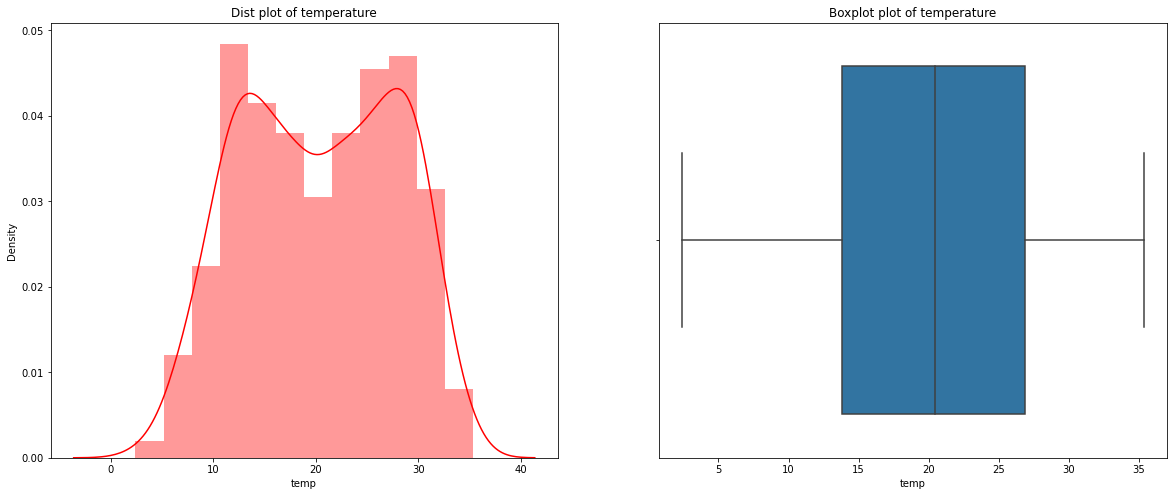

In [28]:
#temp
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of temperature")
sns.distplot(data.temp, color='r')

plt.subplot(1,2,2)
plt.title("Boxplot plot of temperature")
sns.boxplot(data.temp)

plt.show()

In [29]:
data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

#### As seen, the range of the temperature lies between 2.42 to 35.3 degree celcius, with median being 20.4 degree celcius. 

### Feeling Temperature

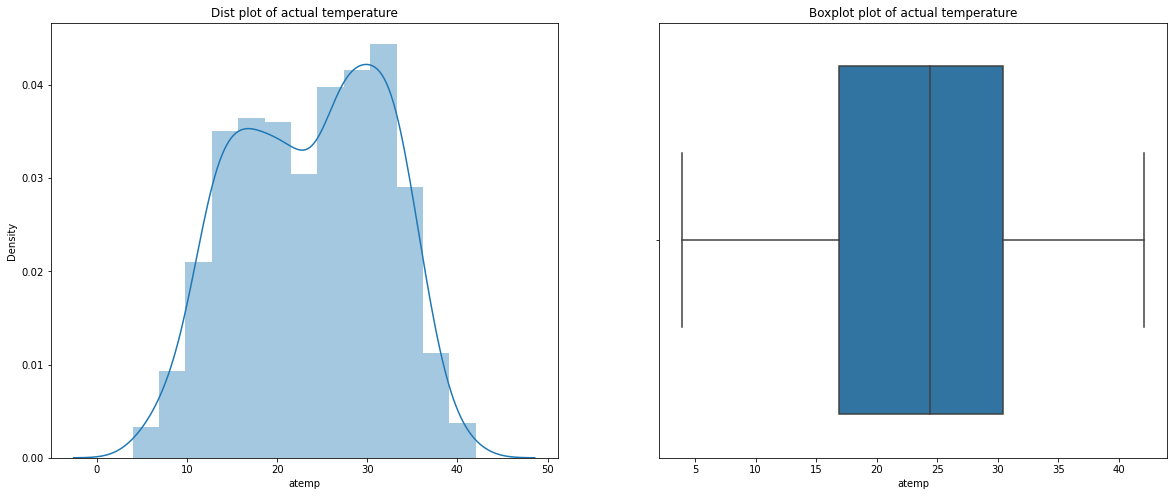

In [30]:
#atemp
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of actual temperature")
sns.distplot(data.atemp)

plt.subplot(1,2,2)
plt.title("Boxplot plot of actual temperature")
sns.boxplot(data.atemp)

plt.show()

In [31]:
data.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

#### As seen, the feeling temperature lies between 4 to 42 degree celcius, with median being 24 degree celcius. This is a bit more than the actual temperature

### Humidity

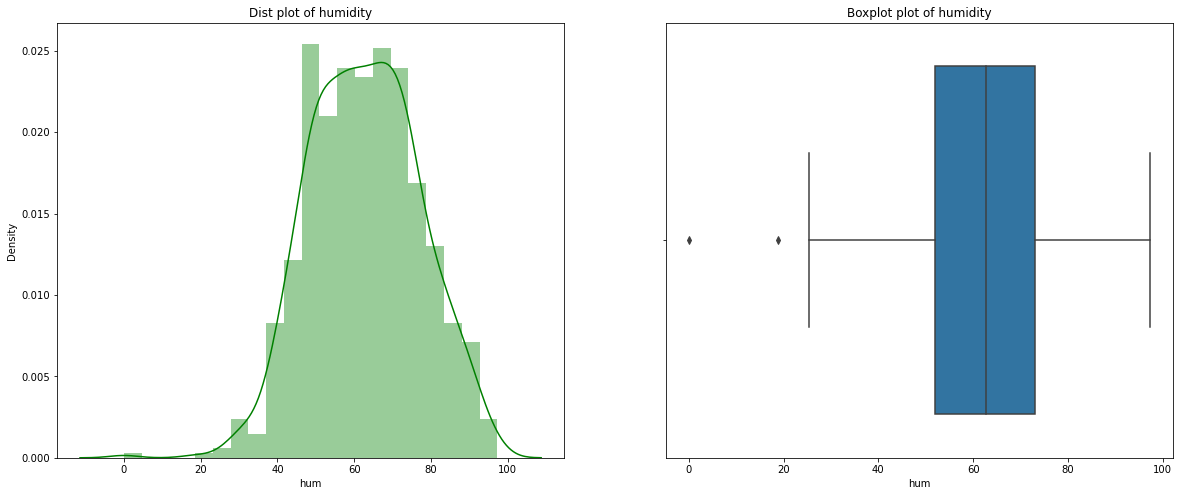

In [32]:
#humidity
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of humidity")
sns.distplot(data.hum, color = 'g')

plt.subplot(1,2,2)
plt.title("Boxplot plot of humidity")
sns.boxplot(data.hum)

plt.show()

In [33]:
data.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

### Outlier treatment for Humidity

In [34]:
a = data.hum.quantile(.005) # use .5 percentile value
a

28.4970715

In [35]:
data[data.hum<a].hum.count()

4

In [36]:
data.hum = data.hum.apply(lambda x : a if x<=a else x)

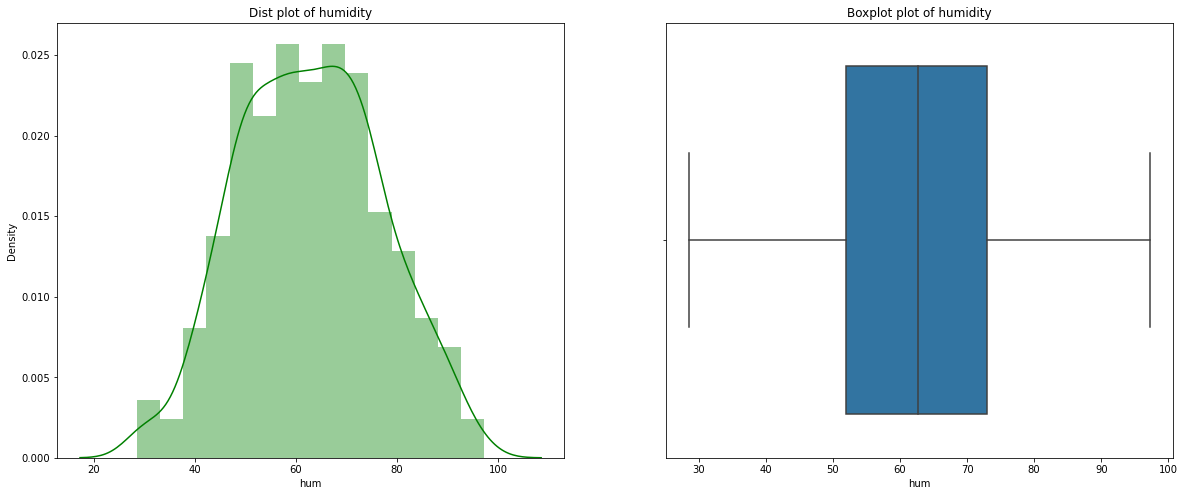

In [37]:
#humidity
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of humidity")
sns.distplot(data.hum, color = 'g')

plt.subplot(1,2,2)
plt.title("Boxplot plot of humidity")
sns.boxplot(data.hum)

plt.show()


In [38]:
data.hum.describe()

count    730.000000
mean      62.822978
std       14.052800
min       28.497072
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

#### It ranges from 28.49 to 97.2 g.kg-1 Also, all the outliers are being trated with .5 percentile value. 

### Windspeed

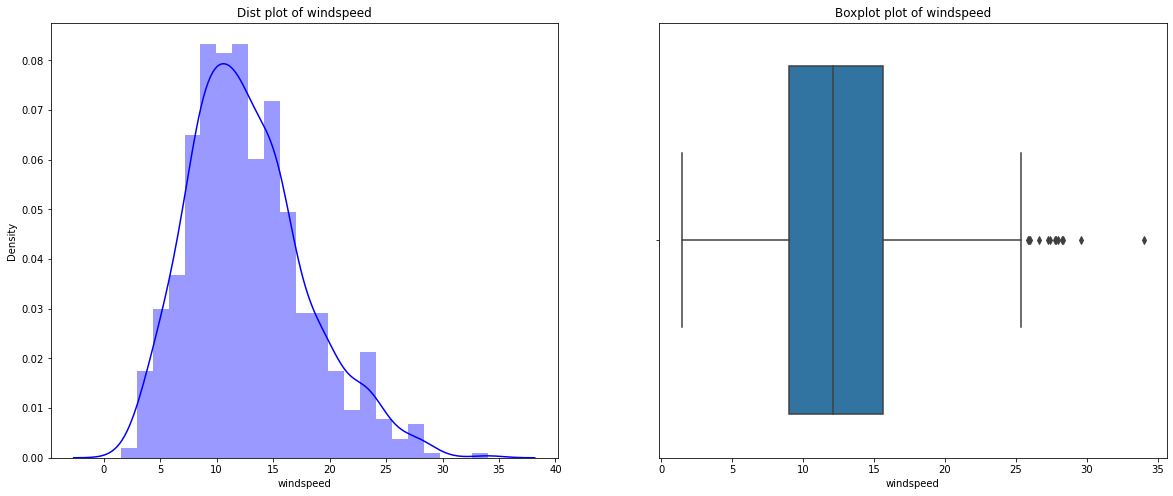

In [39]:
#windspeed
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of windspeed")
sns.distplot(data.windspeed, color = 'blue')

plt.subplot(1,2,2)
plt.title("Boxplot plot of windspeed")
sns.boxplot(data.windspeed)

plt.show()

### Outliers treatment for windspeed

In [40]:
data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [41]:
a = data.windspeed.quantile(.98) # replace all the values greate than with 98 percentile with 98percentile value
a

25.201626559999998

In [42]:
# count the no of values
data[data.windspeed>= a].windspeed.count()

15

In [43]:
data.windspeed = data.windspeed.apply(lambda x : a if x >= a else x)

In [44]:
data.windspeed.describe()

count    730.000000
mean      12.715074
std        5.057614
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       25.201627
Name: windspeed, dtype: float64

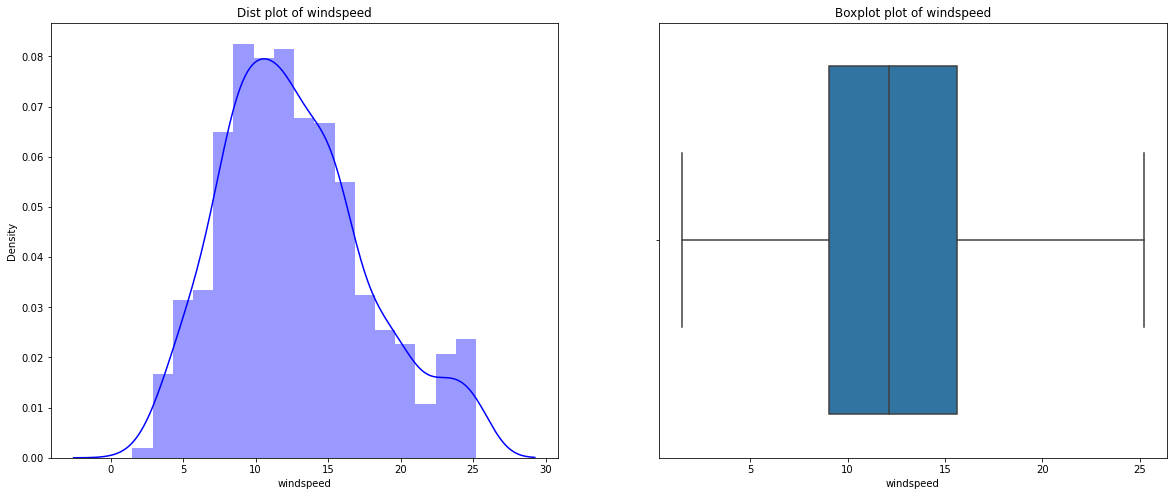

In [45]:
#windspeed
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of windspeed")
sns.distplot(data.windspeed, color = 'blue')

plt.subplot(1,2,2)
plt.title("Boxplot plot of windspeed")
sns.boxplot(data.windspeed)

plt.show()

#### The above plot shows that the windspeed can max upto 25.2. Most of the time, windspeed lies between 9 to 15.

### Casual Users

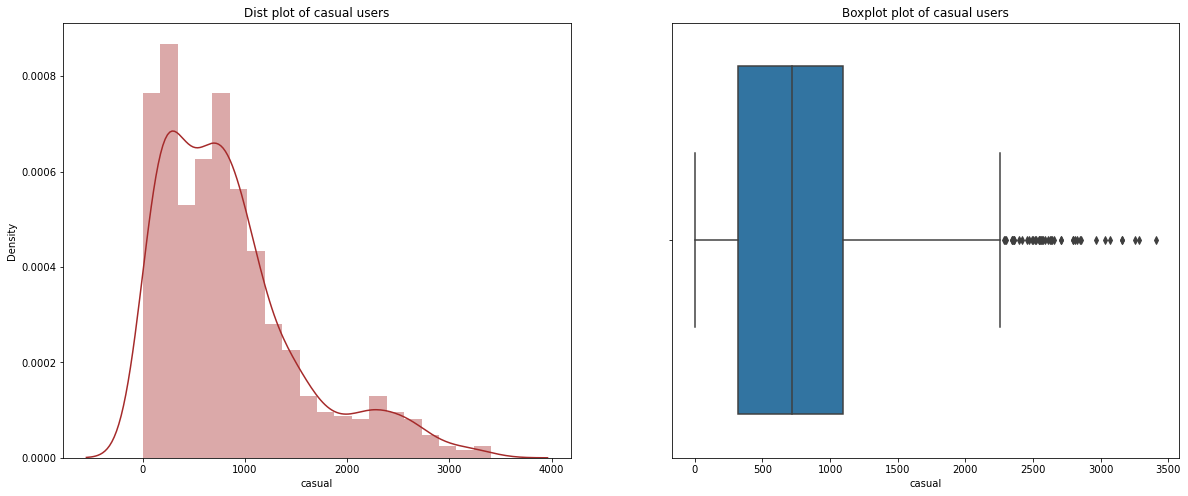

In [46]:
#casual
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of casual users")
sns.distplot(data.casual, color = 'brown')

plt.subplot(1,2,2)
plt.title("Boxplot plot of casual users")
sns.boxplot(data.casual)

plt.show()

#### The count of casual users mostly lies between 0 to 1200. On the higher side, the no of casual users decresing.

### Registered Users

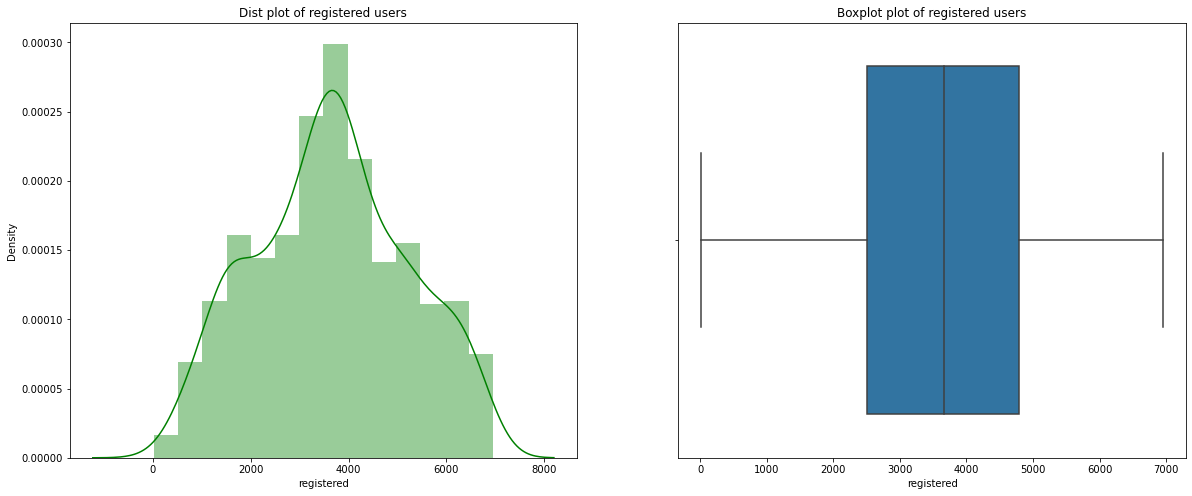

In [47]:
#registered
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of registered users")
sns.distplot(data.registered, color = 'green')

plt.subplot(1,2,2)
plt.title("Boxplot plot of registered users")
sns.boxplot(data.registered)

plt.show()

In [48]:
#### As seen from the plot, the no of registered users renting bike has the median around 3800. 

### Total count

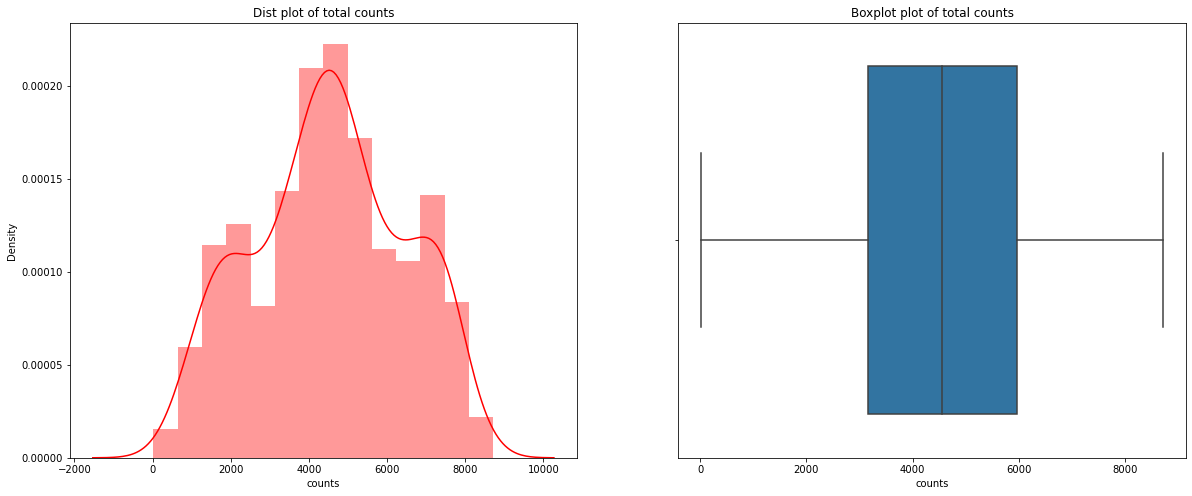

In [49]:
#total counts
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Dist plot of total counts")
sns.distplot(data.counts, color = 'red')

plt.subplot(1,2,2)
plt.title("Boxplot plot of total counts")
sns.boxplot(data.counts)

plt.show()

In [50]:
data.counts.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: counts, dtype: float64

#### The total no of users ( registered and casual both) are ranging from 22 to 8714 who are renting the bikes with the median around 4548

#### Since count contains the sum of casual and registered, we can drop the casual and registered and will do our sanalysis around cnt variable

In [51]:
data = data.drop(columns=['casual', 'registered'])

## Bivariate Analysis

In [52]:
data.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed,counts
0,spring,2018,Jan,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


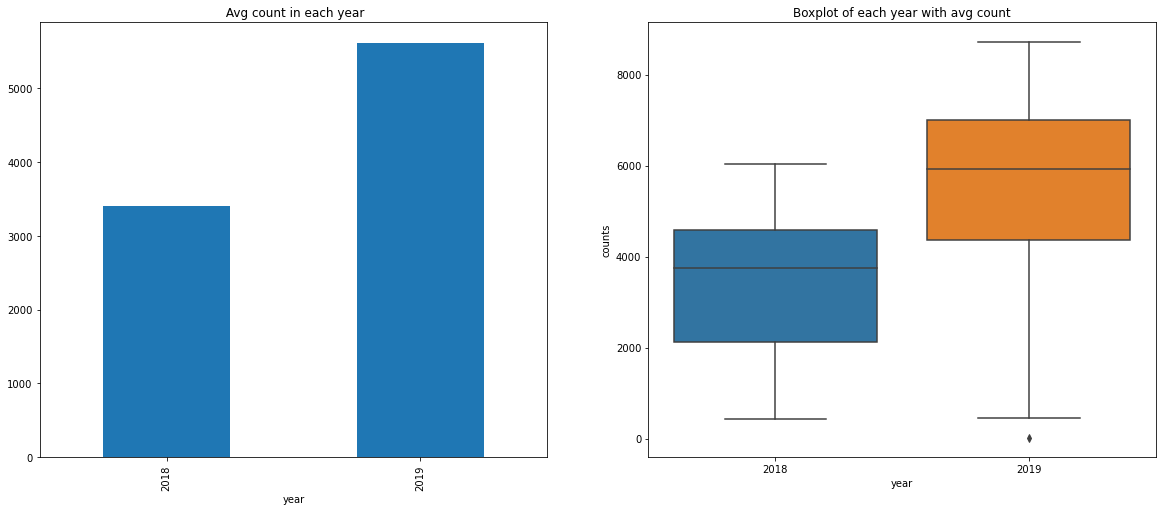

In [53]:
# Let's see the total average count of users year wise 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(" Avg count in each year")
data.groupby('year')['counts'].mean().plot.bar()

plt.subplot(1,2,2)
plt.title("Boxplot of each year with avg count")
sns.boxplot(x = data.year, y = data.counts)

plt.show()


#### As seen, the year 2019 have more users renting the bike as compared to year 2018. 

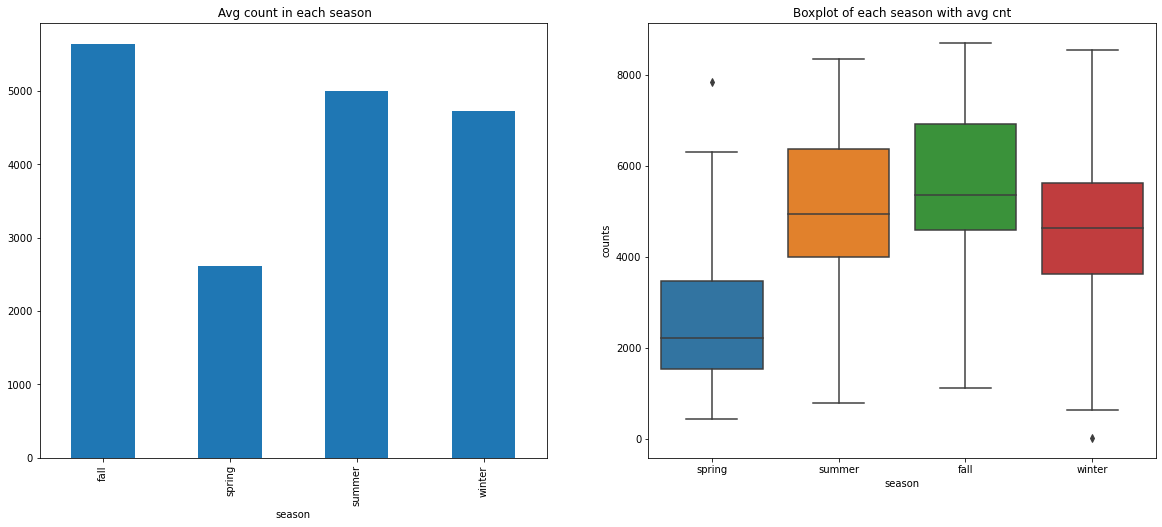

In [54]:
# Let's see the average users count season wise
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(" Avg count in each season")
data.groupby('season')['counts'].mean().plot.bar()

plt.subplot(1,2,2)
plt.title("Boxplot of each season with avg cnt")
sns.boxplot(x = data.season, y = data.counts)
plt.show()


#### The maximum users renting the bikes are in Fall, followed by summer and so on

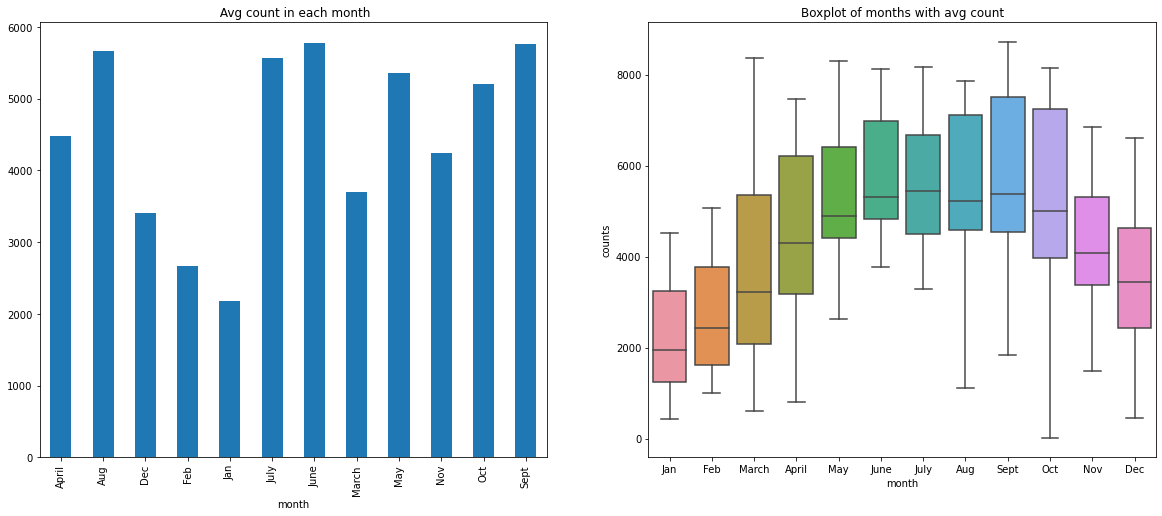

In [55]:
# Month wise average user count renting the bike
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(" Avg count in each month")
data.groupby('month')['counts'].mean().plot.bar()

plt.subplot(1,2,2)
plt.title("Boxplot of months with avg count")
sns.boxplot(x = data.month, y = data.counts)
plt.show()


#### We have a very good no of users renting the bikes in Aug, July, June, September where as in Jan, Feb, we have a lower no of users

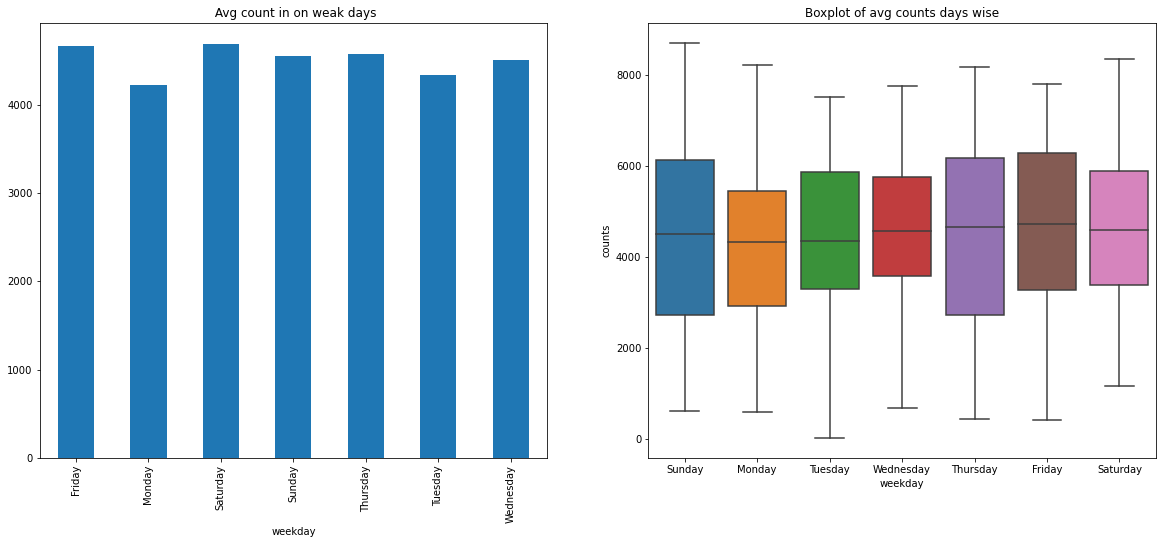

In [56]:
# Let's see the average count weekday wise
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(" Avg count in on weak days")
data.groupby('weekday')['counts'].mean().plot.bar()

plt.subplot(1,2,2)
plt.title("Boxplot of avg counts days wise")
sns.boxplot(x = data.weekday, y = data.counts)
plt.show()


#### All are somewhat on the same cale. Means, weekday does not affect the count too much.

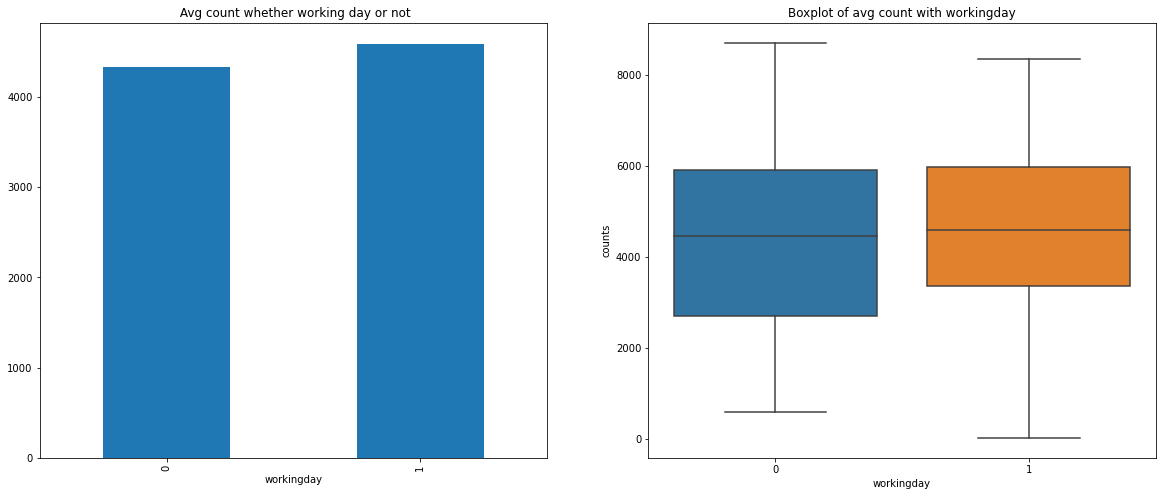

In [57]:
# Let's see if the workingday is affecting the count or not
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(" Avg count whether working day or not")
data.groupby('workingday')['counts'].mean().plot.bar()

plt.subplot(1,2,2)
plt.title("Boxplot of avg count with workingday")
sns.boxplot(x = data.workingday, y = data.counts)
plt.show()


#### It can easlily interpret that either it is working day or not, the count of users is not affecting too much

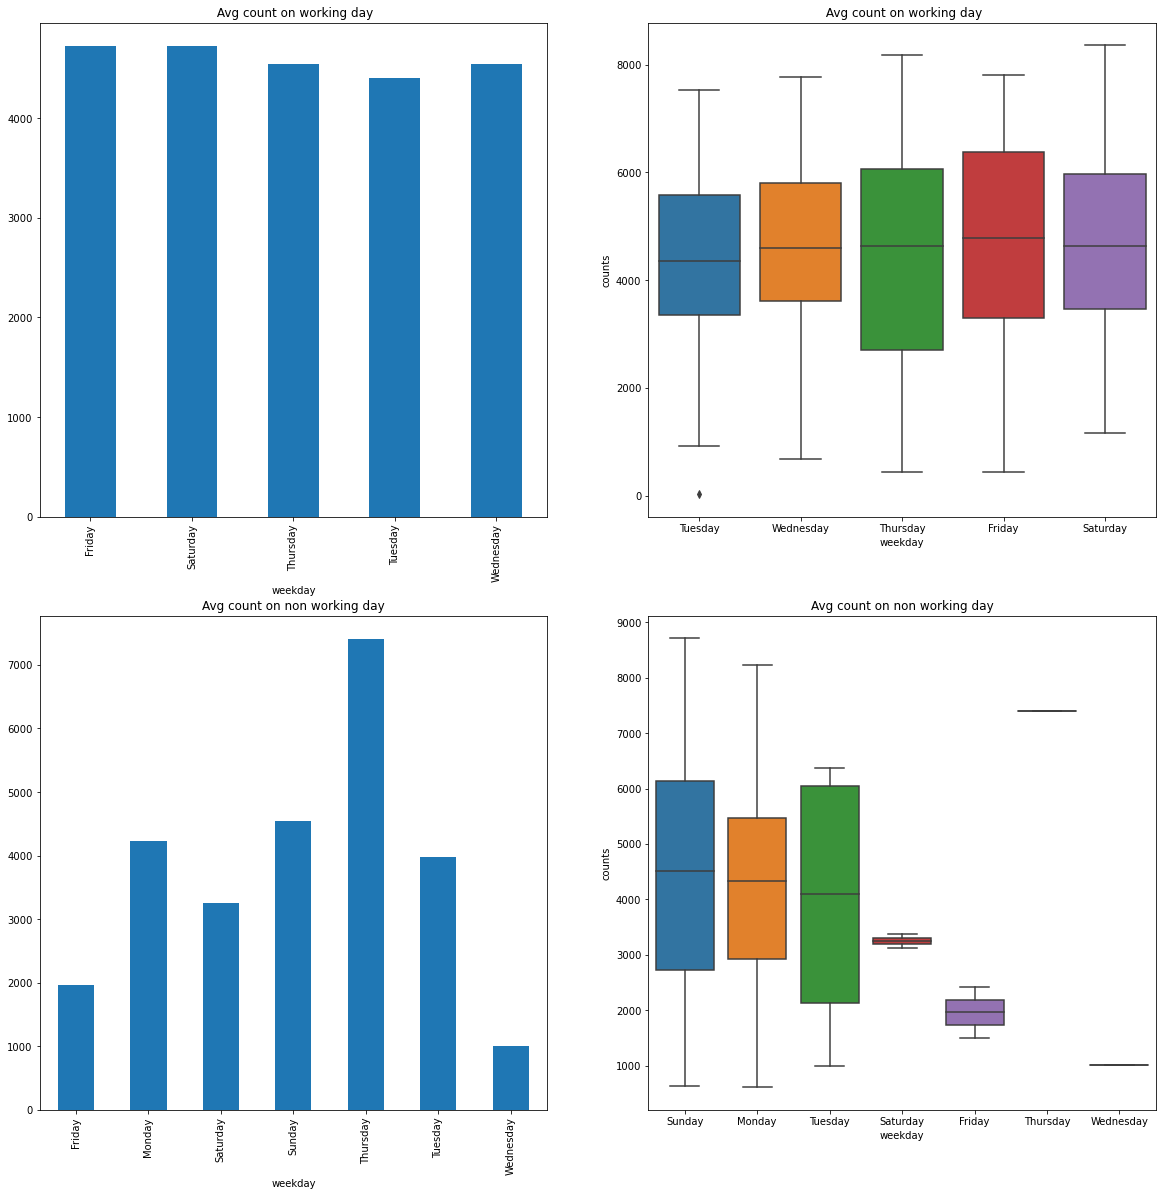

In [58]:
# Let's see if the workingday is affecting the count or not
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title(" Avg count on working day")
data[data.workingday==1].groupby('weekday')['counts'].mean().plot.bar()

plt.subplot(2,2,2)
plt.title(" Avg count on working day")
sns.boxplot(x = data[data.workingday==1].weekday, y = data.counts)

plt.subplot(2,2,3)
plt.title("Avg count on non working day")
data[data.workingday==0].groupby('weekday')['counts'].mean().plot.bar()

plt.subplot(2,2,4)
plt.title("Avg count on non working day")
sns.boxplot(x = data[data.workingday==0].weekday, y = data.counts)


# plt.title("Boxplot of year with cnt")
# sns.boxplot(x = data.workingday, y = data.cnt)
plt.show()


#### As per plots above, if it is working day, we a good no of users on each day, on an average more than 4000. On the other hand, if it is non-working day, users are mostly renting bikes on Sunday, Monday and Tuesday. On other days, we have a very low no of users. 

# Heatmap

<AxesSubplot:>

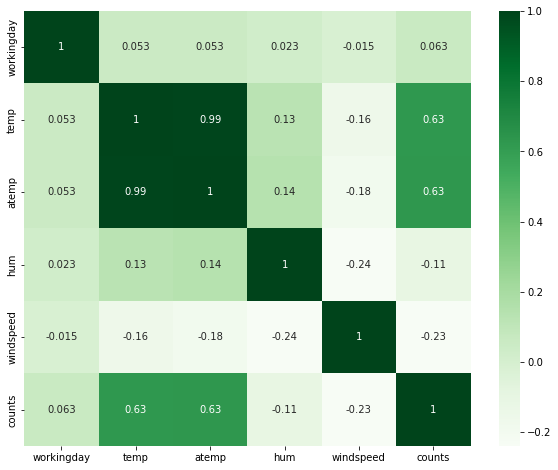

In [59]:
# hetamap of numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='Greens')

In [60]:
# seperate out num and cat variable for easiness.
num_vars = [ 'temp','atemp','hum','windspeed', 'counts']
cat_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'weathersit']

<Figure size 1440x576 with 0 Axes>

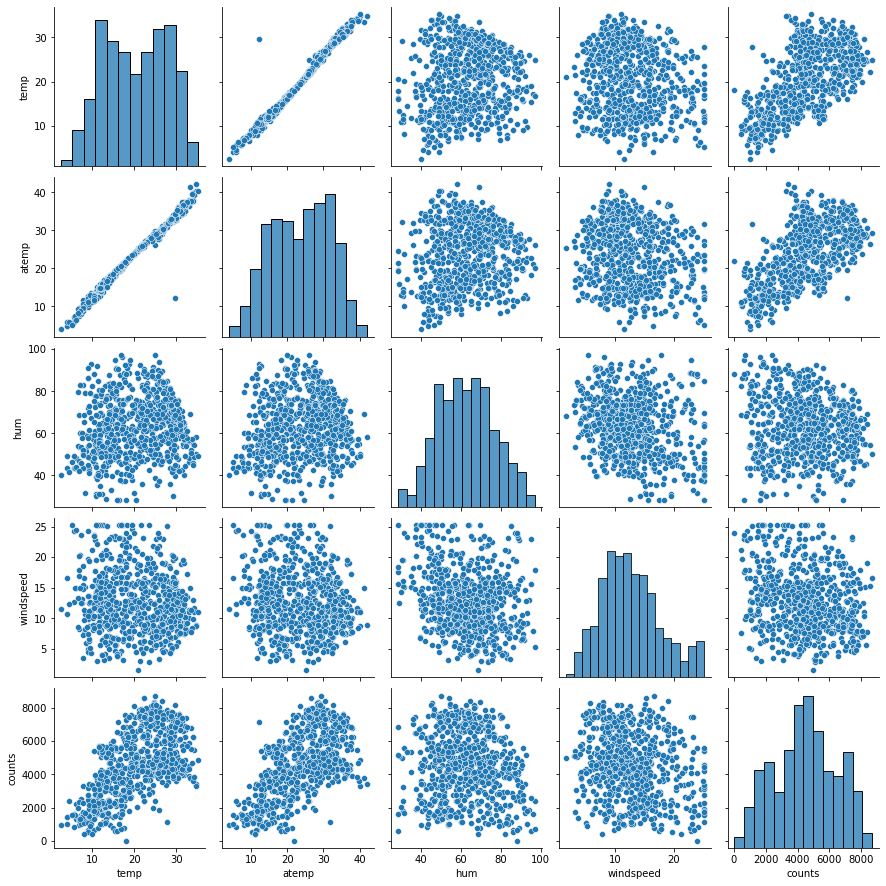

In [61]:
# pair plot
plt.figure(figsize=(20,8))
sns.pairplot(data=data, x_vars=num_vars, y_vars=num_vars)

#### As we can clearly see that there is a strong correlation between temp and atemp, we drop any one of them. Also, temp is negatively correlated to windspeed. Temp has a good correlation with counts variable which is our target variable

In [62]:
# dropping atemp
data = data.drop(columns=['atemp'])

In [63]:
data.head()

,season,year,month,weekday,workingday,weathersit,temp,hum,windspeed,counts
0,spring,2018,Jan,Sunday,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Monday,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Thursday,1,Clear,9.305237,43.6957,12.522300,1600


In [64]:
data.shape # Final shape before building model

(730, 10)

## Prepare data for model building

In [92]:
df = data # just for fun

## Converting categorical columns into numeric ( dummy variables and 0/1 mapping)

In [93]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [94]:
# 1 Season
seas = pd.get_dummies(df.season, drop_first=True)
seas.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [95]:
#2 Month
month = pd.get_dummies(df.month, drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [96]:
#3 Weekday
wkd = pd.get_dummies(df.weekday, drop_first=True)
wkd.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [97]:
#4 Weathersit
weather = pd.get_dummies(df.weathersit, drop_first=True)
weather.head()

,Cloudy,Snow/Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [98]:
# concatenate all the newly created columns with the main data
df = pd.concat([df, seas, month, wkd, weather], axis = 1)

In [99]:
# Changing the year values to 0 and 1
df.year = df.year.map({'2018':0, '2019':1})

In [100]:
# As these columns have already converted into numeric one, we can drop these
df = df.drop(columns=['season', 'month', 'weekday', 'weathersit'])

In [101]:
df.head()

,year,workingday,temp,hum,windspeed,counts,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Snow/Rain
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [102]:
df.shape

(730, 28)

## Splitting the Data into Training and Testing Sets

In [103]:
df_train, df_test = train_test_split(df, train_size=.7, random_state=100)

In [104]:
df_train.shape

(510, 28)

## Rescaling the features

#### We will be using MinMax scaling

In [105]:
# We specify this so that the train and test data set always have the same rows, respectively
scaler = MinMaxScaler()
v = ['temp', 'hum', 'windspeed', 'counts'] # the columns have to be rescaled only. 
df_train[v] = scaler.fit_transform(df_train[v])

In [106]:
df_train.head()

,year,workingday,temp,hum,windspeed,counts,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Snow/Rain
576,1,1,0.815169,0.611567,0.368802,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.490599,0.355784,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.245101,0.289391,0.923946,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.298510,0.262614,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,1,0.345824,0.648646,0.530844,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [107]:
df_train.describe()

,year,workingday,temp,hum,windspeed,counts,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Snow/Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537440,0.506288,0.444472,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.345098,0.029412
std,0.500429,0.468282,0.225858,0.202783,0.229175,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.346836,0.277528,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.542596,0.509747,0.413498,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.652902,0.577474,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can see now that all the variables are having maximum value to 1 and minimum value to 0

## Dividing into X and Y sets for the model building


In [108]:
y_train = df_train.pop('counts') # Y
X_train = df_train # X

## Building our model

#### This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)  RFE (Recursive feature elimination)

In [109]:
# Runnig RFE
lm = LinearRegression() # creating object of LinearRegression
lm.fit(X_train, y_train) # fitting the x and y

rfe = RFE(lm, 15) # We are selecting the top 15 features from the set of 28
rfe = rfe.fit(X_train, y_train)

In [110]:
# checking the ranks and which features are selected and ignored
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sept', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 9),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('Cloudy', True, 1),
 ('Snow/Rain', True, 1)]

In [111]:
# The features that got selected
X_train.columns[rfe.support_]

Index(['year', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'July', 'Sept', 'Monday', 'Sunday', 'Cloudy',
       'Snow/Rain'],
      dtype='object')

In [112]:
# Let's select only those columns which are being approved by RFE
X_train_new = X_train[X_train.columns[rfe.support_]]

In [113]:
X_train_new.shape

(510, 15)

## Building model using statsmodel, for the detailed statistics

In [114]:
# Function to calculate the VIF
def vif_calc(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    

In [115]:
# Function to build the model
def build_model_stats(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()
    print(lr_model.params)
    print(lr_model.summary())
    return lr_model

## Model 1

In [116]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const         0.150554
year          0.230074
workingday    0.101045
temp          0.511073
hum          -0.115591
windspeed    -0.136242
spring       -0.051131
summer        0.051059
winter        0.093529
Jan          -0.034053
July         -0.053087
Sept          0.081519
Monday        0.057778
Sunday        0.110430
Cloudy       -0.054753
Snow/Rain    -0.241487
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.67e-191
Time:                        10:19:51   Log-Likelihood:                 519.03
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:        

#### As from above results,  Jan has a high p-value. So let's remove Jan variable

In [117]:
# Remove Jan
X_train_new = X_train_new.drop(columns=['Jan'])
X_train_new.shape

(510, 14)

## Model 2

In [118]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const         0.136607
year          0.229318
workingday    0.101662
temp          0.528988
hum          -0.118895
windspeed    -0.132410
spring       -0.055640
summer        0.054006
winter        0.099387
July         -0.054772
Sept          0.082097
Monday        0.058691
Sunday        0.110857
Cloudy       -0.054800
Snow/Rain    -0.238999
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.63e-191
Time:                        10:20:01   Log-Likelihood:                 517.05
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -94

####  Again. all the p-values are in good range but workingday has a high VIF, 16.66 . Let's remove it

In [119]:
#remove workingday
X_train_new = X_train_new.drop(columns=['workingday'])
X_train_new.shape

(510, 13)

## Model 3

In [120]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.235305
year         0.229764
temp         0.530481
hum         -0.119657
windspeed   -0.134400
spring      -0.058128
summer       0.054450
winter       0.096545
July        -0.053993
Sept         0.078560
Monday      -0.038965
Sunday       0.013083
Cloudy      -0.052732
Snow/Rain   -0.234001
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.36e-189
Time:                        10:20:26   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                        

#### In this model we got the coefficient of Monday as negative, but in previous model, it was positive. It shoould not happen and let's remove Monday too. 

In [121]:
# remove Monday
X_train_new = X_train_new.drop(columns=['Monday'])

## Model 4

In [122]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.230625
year         0.229742
temp         0.533022
hum         -0.125497
windspeed   -0.135999
spring      -0.058675
summer       0.054002
winter       0.094990
July        -0.056753
Sept         0.079735
Sunday       0.019608
Cloudy      -0.049933
Snow/Rain   -0.227763
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.00e-187
Time:                        10:21:03   Log-Likelihood:                 503.29
No. Observations:                 510   AIC:                            -980.6
Df Residuals:                     497   BIC:                            -925.5
Df Model:                          12                  

#### We can remove Sunday too as its p-value is close to .05

In [123]:
# Removing Sunday
X_train_new = X_train_new.drop(columns=['Sunday'])
X_train_new.shape

(510, 11)

## Model 5

In [124]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.234802
year         0.229244
temp         0.532504
hum         -0.128100
windspeed   -0.135354
spring      -0.058625
summer       0.053870
winter       0.095377
July        -0.056384
Sept         0.079937
Cloudy      -0.049200
Snow/Rain   -0.226068
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.92e-188
Time:                        10:21:16   Log-Likelihood:                 501.73
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     498   BIC:                            -928.6
Df Model:                          11                                        

#### Let's remove Humidity variable also because of high VIF

In [125]:
# Remove Humidity
X_train_new = X_train_new.drop(columns=['hum'])
X_train_new.shape

(510, 10)

## Model 6

In [126]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.199224
year         0.233914
temp         0.490573
windspeed   -0.109654
spring      -0.070820
summer       0.046779
winter       0.078567
July        -0.050793
Sept         0.073260
Cloudy      -0.078148
Snow/Rain   -0.279392
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.42e-185
Time:                        10:21:54   Log-Likelihood:                 491.35
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     499   BIC:                            -914.1
Df Model:                          10                                         
Covariance Type:    

#### Now we have VIF for temp greater than 5. Let's try to remove temp variable and see how r2 score and adjusted r2 score varies

## Model 7

In [127]:
# Remove temp
temp = X_train_new.temp # store it for further use
X_train_new = X_train_new.drop(columns=['temp']) # store into new dataframe 
X_train_new.shape

(510, 9)

In [128]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.584123
year         0.247535
windspeed   -0.128555
spring      -0.303815
summer      -0.044261
winter      -0.082441
July        -0.011421
Sept         0.068924
Cloudy      -0.087351
Snow/Rain   -0.290507
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.81e-148
Time:                        10:22:08   Log-Likelihood:                 401.15
No. Observations:                 510   AIC:                            -782.3
Df Residuals:                     500   BIC:                            -740.0
Df Model:                           9                                         
Covariance Type:            nonrobust     

#### We can clearly see that after removing temp, our r2 score and adjusted r2 score both goes significantly down from 83% to 75%. Also, temp is very important variable as it has a strong correlation with counts variable. 
#### Also, we can see that July has suddenly got the high p-value, which means it is insignifant and let's remove July

## Model 8

In [129]:
# Remove July
X_train_new = X_train_new.drop(columns=['July']) # store into new dataframe 
X_train_new.shape

(510, 8)

In [130]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.579882
year         0.247578
windspeed   -0.128485
spring      -0.299760
summer      -0.040217
winter      -0.078605
Sept         0.072129
Cloudy      -0.086981
Snow/Rain   -0.290634
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.78e-149
Time:                        10:22:34   Log-Likelihood:                 401.02
No. Observations:                 510   AIC:                            -784.0
Df Residuals:                     501   BIC:                            -745.9
Df Model:                           8                                         
Covariance Type:            nonrobust                           

#### We removed temp and saw July has got high p-value. Now we removed July and let's try to add temp again as it is a significant variable as business point of view also and it has good correlation with target variable

## Model 9 ( Final )

In [131]:
# add temp
X_train_new['temp'] = temp # already stored
X_train_new.head()

,year,windspeed,spring,summer,winter,Sept,Cloudy,Snow/Rain,temp
576,1,0.368802,0,0,0,0,0,0,0.815169
426,1,0.355784,1,0,0,0,1,0,0.442393
728,1,0.923946,1,0,0,0,0,0,0.245101
482,1,0.262614,0,1,0,0,1,0,0.395666
111,0,0.530844,0,1,0,0,1,0,0.345824


In [132]:
print("Model-----\n")
lr_model = build_model_stats(X_train_new, y_train) # build model

print('\nVIF values------\n')
vif_calc(X_train_new) # check VIF for multicollinearity

Model-----

const        0.190914
year         0.234459
windspeed   -0.109847
spring      -0.059308
summer       0.061995
winter       0.091024
Sept         0.087108
Cloudy      -0.076777
Snow/Rain   -0.280241
temp         0.477619
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.32e-185
Time:                        10:22:50   Log-Likelihood:                 487.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     500   BIC:                            -913.0
Df Model:                           9                                         
Covariance Type:            nonrobust     

### Now we have al the VIF and p-values in good range.

## Residual Analysis of the train data

In [133]:
X_train_new.shape

(510, 9)

In [134]:
# Predict on train dataset
X_train_new_sm = sm.add_constant(X_train_new) # add constant
y_train_pred = lr_model.predict(X_train_new_sm) # predict

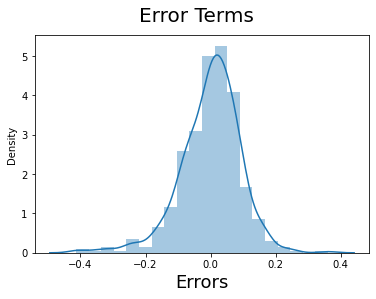

In [135]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### As we can see that the error terms are normally distributed, we can say that our assumption is correct and our model is good.

In [136]:
# check the sum of error terms
sum((y_train - y_train_pred))

-5.103695244201845e-13

#### The sum of error terms is approx zero. Our next assumption is also correct.

In [137]:
# r2 score for train dataset
r2_score(y_train,  y_train_pred)

0.8279485319754247

In [138]:
# Remained columns are
X_train_new.columns

Index(['year', 'windspeed', 'spring', 'summer', 'winter', 'Sept', 'Cloudy',
       'Snow/Rain', 'temp'],
      dtype='object')

## Making Predictions

#### Applying the scaling on the test sets

In [139]:
v = ['temp', 'hum', 'windspeed', 'counts'] # these columns needs to be scaled
df_test[v] = scaler.transform(df_test[v]) # we do transform on test dataset

In [140]:
df_test.head()

,year,workingday,temp,hum,windspeed,counts,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Snow/Rain
184,0,0,0.831783,0.514915,0.117347,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,1,1,0.901354,0.448047,0.214198,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,1,0.511964,0.770223,0.465669,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
221,0,1,0.881625,0.203074,0.473143,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0,1,0.817246,0.029221,0.748811,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dividing into X_test and y_test

In [141]:
# Divide into x and y

y_test = df_test.pop('counts')
X_test = df_test[X_train_new.columns] # use only those columns on which our model is built ( using train dataset)
X_test.head()

,year,windspeed,spring,summer,winter,Sept,Cloudy,Snow/Rain,temp
184,0,0.117347,0,0,0,0,1,0,0.831783
535,1,0.214198,0,1,0,0,0,0,0.901354
299,0,0.465669,0,0,1,0,1,0,0.511964
221,0,0.473143,0,0,0,0,0,0,0.881625
152,0,0.748811,0,1,0,0,0,0,0.817246


In [142]:
# Now let's make prediction using our model.

X_test_sm = sm.add_constant(X_test) # add constant
y_test_pred = lr_model.predict(X_test_sm) # prediction making

In [143]:
print('R2 score for test dataset: ', r2_score(y_test, y_test_pred))
print('R2 score for train dataset: ',r2_score(y_train, y_train_pred))

R2 score for test dataset:  0.8010733802155717
R2 score for train dataset:  0.8279485319754247


## Model Evaluation

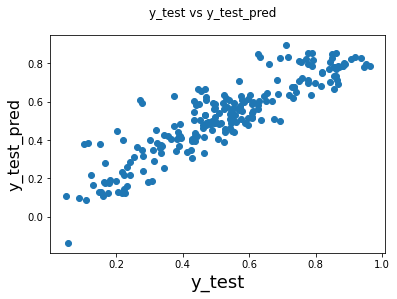

In [144]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred')              # Plot heading 
plt.xlabel('y_test', fontsize=18)                  # X-label
plt.ylabel('y_test_pred', fontsize=16)             # Y-label
plt.show()

<AxesSubplot:>

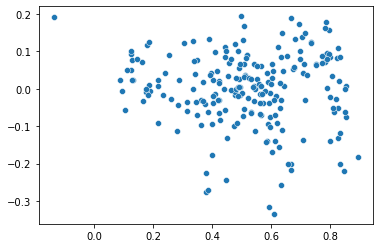

In [145]:
residuals = y_test-y_test_pred
sns.scatterplot(y_test_pred,residuals)


## Key findings:

 #### Stats:
 r2 score on training : 0.8279<br>
 Prob (F-statistic):   9.32e-185<br>
 r2 score on test : 0.8010<br>

## Top 5 variables that are affecting the count of rental bikes are:

 Temperature :       0.477619<br>
 <br>
 Year :              0.234459<br>
 <br>
 Snow/Rain weather: -0.280241<br>
 <br>
 Windspeed :        -0.109847<br>
 <br>
 Winter :            0.091024<br>


### Equation: 

y =   0.190914 + 0.234459*year + 0.477619*temp - 0.109847*windspeed - 0.059308*spring + 0.061995*summer + 0.091024*winter - 0.050958*July + 0.087108*Sept - 0.078473*076777 - 0.280241*Snow_Rain

## All varibles

const  :      0.190914<br>
year    :     0.234459<br>
windspeed:   -0.109847<br>
spring    :  -0.059308<br>
summer     :  0.061995<br>
winter      : 0.091024<br>
Sept         :0.087108<br>
Cloudy   :   -0.076777<br>
Snow/Rain :  -0.280241<br>
temp       :  0.477619<br>